# BRAINWAVE MATRIX SOLUTION DATA ANALYST

# GOAL OF THE PROJECT 

   >In this project, we aim to develop a Social Media Sentiment Analysis system to assist organizations, including platforms like Facebook and Twitter. The objective is to understand and analyze user sentiments, enabling the organization to better serve users by providing the information or objects they are searching for Facebook, Twitter and Instagram.

In [1]:
#import library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_row',None)
pd.set_option('display.max_column',None)

In [2]:
#import dataset:
df=pd.read_csv(r'C:\Users\RAMANATHAN\OneDrive\Desktop\INSTERNSHIP\BRAINWAVE MATRIX SOLUTIONS\sentimentdataset.csv')

In [3]:
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19
5,Feeling grateful for the little things in lif...,Positive,16-01-2023 09:10,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25,50,India,2023,1,16,9
6,Rainy days call for cozy blankets and hot coc...,Positive,16-01-2023 14:45,RainyDays,Facebook,#RainyDays #Cozy,10,20,Canada,2023,1,16,14
7,The new movie release is a must-watch! ...,Positive,16-01-2023 19:30,MovieBuff,Instagram,#MovieNight #MustWatch,15,30,USA,2023,1,16,19
8,Political discussions heating up on the timel...,Negative,17-01-2023 08:00,DebateTalk,Twitter,#Politics #Debate,30,60,USA,2023,1,17,8
9,Missing summer vibes and beach days. ...,Neutral,17-01-2023 12:20,BeachLover,Facebook,#Summer #BeachDays,18,35,Australia,2023,1,17,12


# DATA EXPLORATION AND CLEANING

In [4]:
#shape of dataset:
print('The shape of dataset is:')
df.shape

The shape of dataset is:


(712, 13)

In [5]:
# columns of dataset:
df.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [6]:
# information of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       712 non-null    object
 1   Sentiment  712 non-null    object
 2   Timestamp  712 non-null    object
 3   User       712 non-null    object
 4   Platform   712 non-null    object
 5   Hashtags   712 non-null    object
 6   Retweets   712 non-null    int64 
 7   Likes      712 non-null    int64 
 8   Country    712 non-null    object
 9   Year       712 non-null    int64 
 10  Month      712 non-null    int64 
 11  Day        712 non-null    int64 
 12  Hour       712 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 72.4+ KB


In [7]:
# To check the duplicates of dataset:
print('Total no of duplicates:')
df.duplicated().sum()

Total no of duplicates:


0

In [8]:
# To check the null values of dataset:
print('Total No of null values:')
df.isnull().sum()

Total No of null values:


Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [9]:
# To remove the space:
df['Text']=df['Text'].str.strip()
df['Sentiment']=df['Sentiment'].str.strip()
df['User']=df['User'].str.strip()
df['Platform']=df['Platform'].str.strip()
df['Hashtags']=df['Hashtags'].str.strip()
df['Country']=df['Country'].str.strip()

In [10]:
# To change the datatypes:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Day']=df['Timestamp'].dt.day
df['Month']=df['Timestamp'].dt.month
df['Year']=df['Timestamp'].dt.year

In [11]:
df.dtypes

Text                 object
Sentiment            object
Timestamp    datetime64[ns]
User                 object
Platform             object
Hashtags             object
Retweets              int64
Likes                 int64
Country              object
Year                  int64
Month                 int64
Day                   int64
Hour                  int64
dtype: object

In [12]:
# Describe:
df.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,21.542135,42.966292,2020.476124,6.205056,15.417135,15.592697
std,7.124840,14.215995,2.828326,3.591297,8.475091,4.062778
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,2.000000,8.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.250000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


# EXPLORATORY DATA ANALYSIS

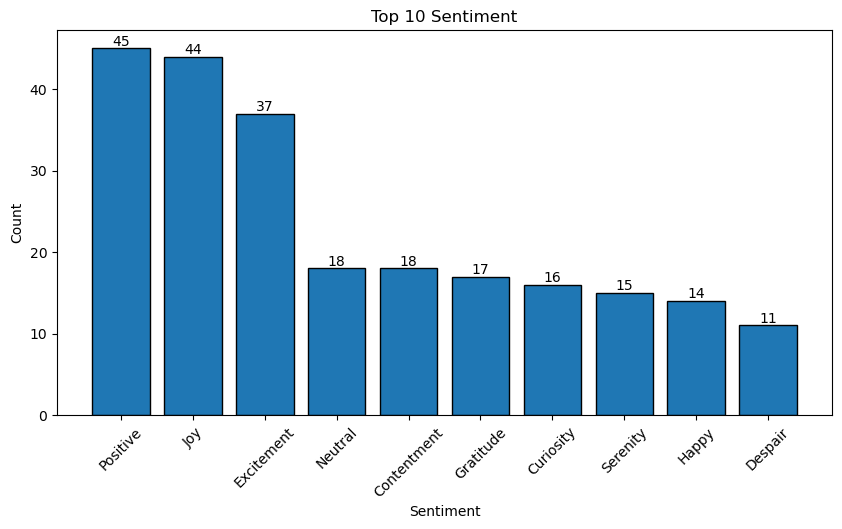

In [38]:
sentiment_count=df['Sentiment'].value_counts().nlargest(10)
#print(sentiment_count)

# Bar plot shows top 10 sentiment.
plt.figure(figsize=(10,5))
plt.bar(sentiment_count.index,sentiment_count.values,edgecolor='black')
for i in range(len(sentiment_count)):
    plt.text(sentiment_count.index[i],sentiment_count.values[i],str(sentiment_count.values[i]),va='bottom',ha='center')
plt.title('Top 10 Sentiment')
plt.xticks(rotation=45)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

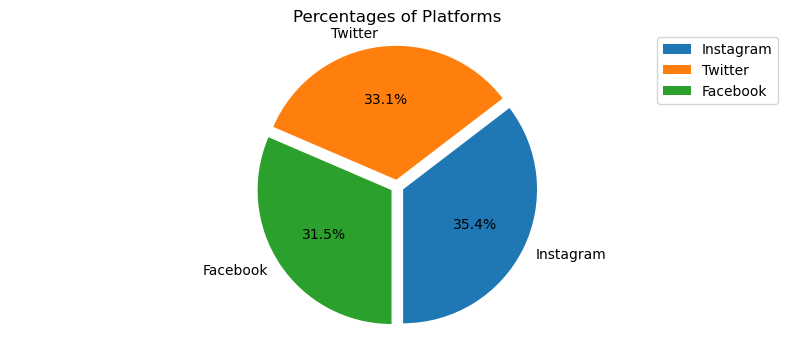

In [14]:
platform_count=df['Platform'].value_counts()
#print(platform_count)

# Pie plot shows platform percentage.
plt.figure(figsize=(10,4))
plt.pie(x=platform_count,labels=platform_count.index,autopct='%1.1f%%',explode=[0.05]*len(platform_count),startangle=270)
plt.title('Percentages of Platforms')
plt.legend()
plt.axis('equal')
plt.show()

>There are three platform (Facebook, Twitter and Instagram) are used by users. But, the pie chart discribe that the Instagram(35.4%) platform is the most used platform by the users.

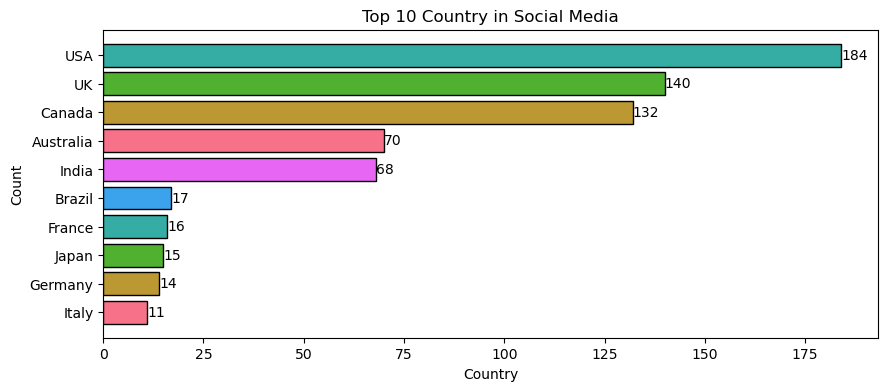

In [15]:
country_count=df['Country'].value_counts().nlargest(10).sort_values(ascending=True)
#print(country_count)

# Bar plot shows top 10 countries.
plt.figure(figsize=(10,4))
plt.barh(country_count.index,country_count.values,color=sns.color_palette('husl'),edgecolor='black')
for i in range(len(country_count)):
    plt.text(country_count.values[i],i,str(country_count.values[i]),va='center',ha='left')
plt.title('Top 10 Country in Social Media')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

>The horizontal bar chart shows top 10 country uses the social media. USA(184) is in first place of using the social media and India(68) is in fifth place.

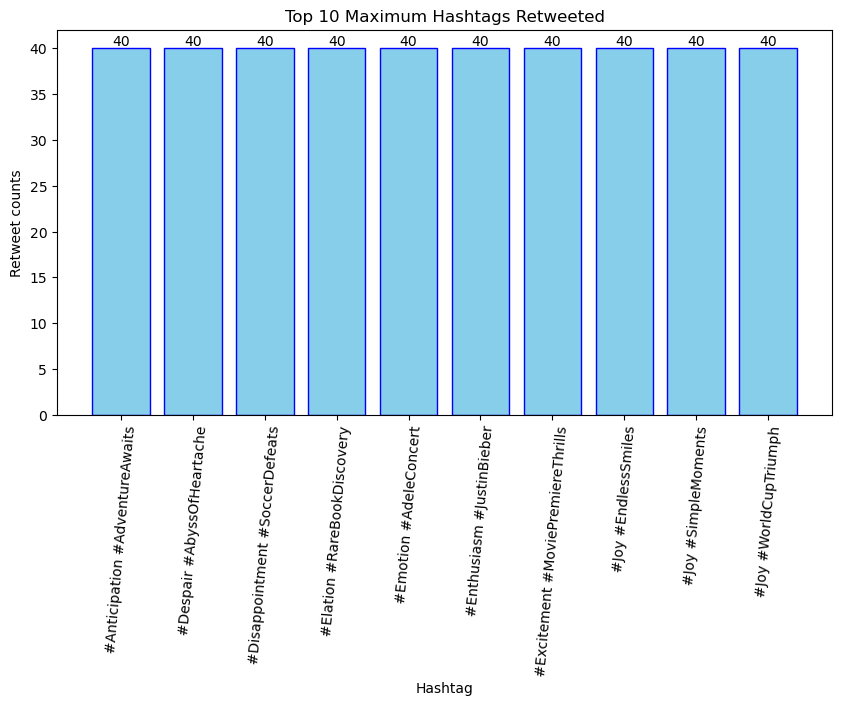

In [56]:
hashtag_with_retweets=df.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
hashtag_with_retweets

# Bar plot shows top 10 maximum retweet of hashtag.
plt.figure(figsize=(10,5))
plt.bar(hashtag_with_retweets.index,hashtag_with_retweets.values,edgecolor='blue',color='skyblue')
for i in range(len(hashtag_with_retweets)):
    plt.text(hashtag_with_retweets.index[i],hashtag_with_retweets.values[i],str(hashtag_with_retweets.values[i]),va='bottom',ha='center')
plt.title('Top 10 Maximum Hashtags Retweeted')
plt.xlabel('Hashtag')
plt.ylabel('Retweet counts')
plt.xticks(rotation=85)
plt.show()

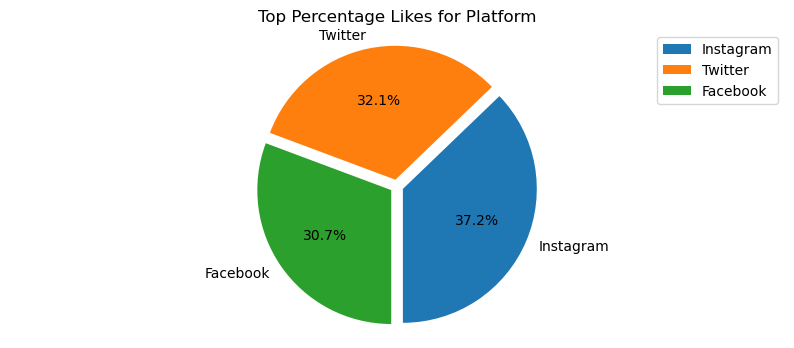

In [17]:
top_likes_platform=df.groupby('Platform')['Likes'].sum().nlargest()
#print(top_likes_platform)

# Pie plot shows top likes for platform.
plt.figure(figsize=(10,4))
plt.pie(x=top_likes_platform,labels=top_likes_platform.index,autopct='%1.1f%%',explode=[0.05]*len(top_likes_platform),startangle=270)
plt.legend(top_likes_platform.index)
plt.title('Top Percentage Likes for Platform')
plt.axis('equal')
plt.show()

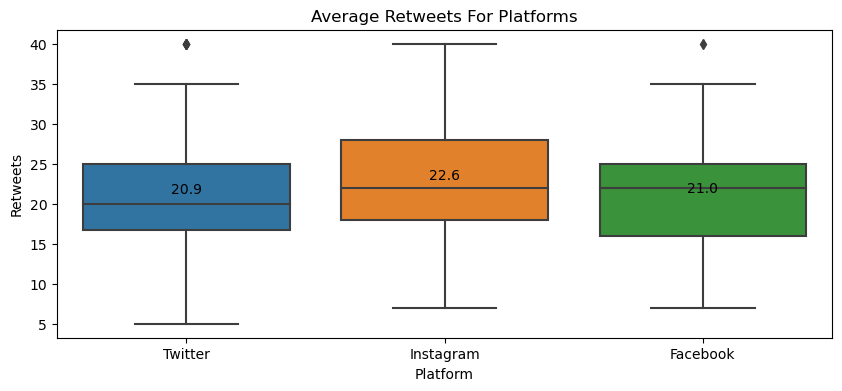

In [18]:
#top_retweet_platform=df.groupby('Platform')['Retweets'].sum()
#top_retweet_platform

plt.figure(figsize=(10,4))
sns.boxplot(x='Platform',y='Retweets',data=df)
for i in range(len(df['Platform'].unique())):
    mean_retweets = df[df['Platform'] == df['Platform'].unique()[i]]['Retweets'].mean()
    plt.text(i, mean_retweets, f'{mean_retweets:.1f}', ha='center', va='bottom')   
plt.title('Average Retweets For Platforms')
plt.show()

> Above pie charts shows that percentage of likes recevied by different platform on social media. Instagram is in the first place for getting most likes in the social media platform.

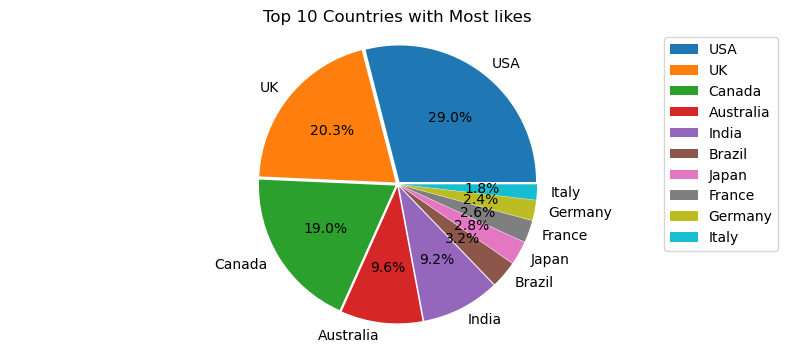

In [19]:
country_with_most_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
#print(country_with_most_likes)

# Bar plot shows Top 10 country with most likes.
plt.figure(figsize=(10,4))
plt.pie(country_with_most_likes,labels=country_with_most_likes.index,autopct='%1.1f%%',explode=[0.02]*len(country_with_most_likes))
plt.title('Top 10 Countries with Most likes')
plt.legend(country_with_most_likes.index)
plt.axis('equal')
plt.show()

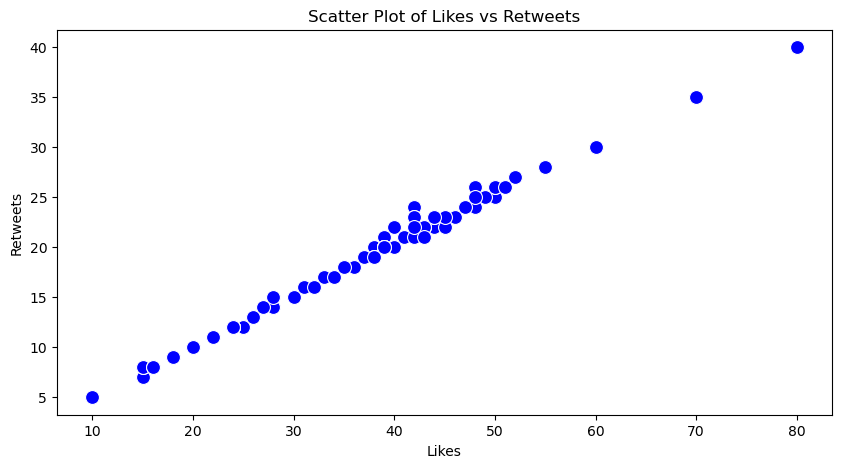

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Likes',y='Retweets',data=df,s=100,color='blue')
plt.title('Scatter Plot of Likes vs Retweets')
plt.show()

# FACEBOOK

In [21]:
Facebook=df[df['Platform']=='Facebook']

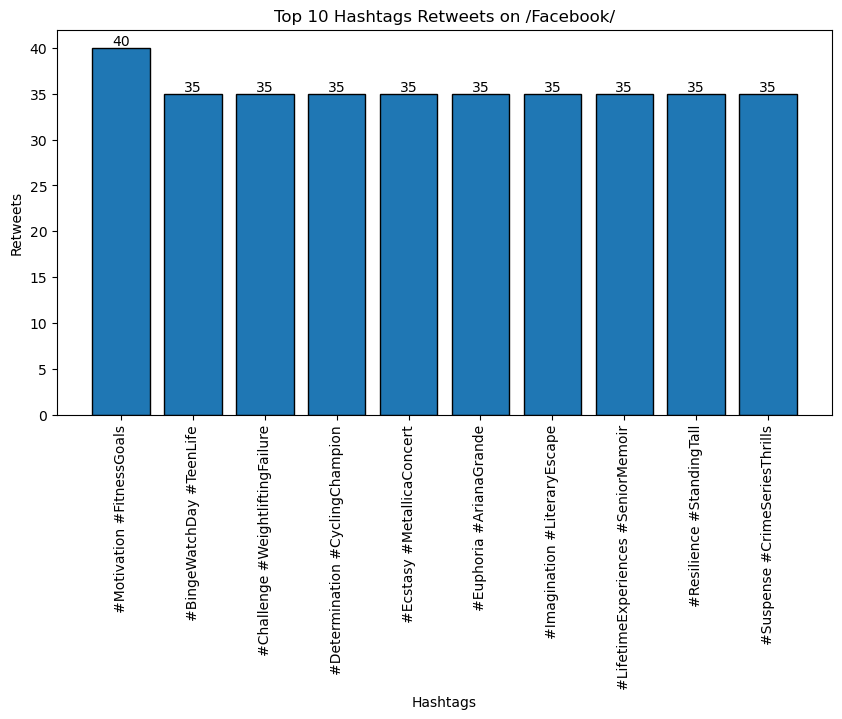

In [42]:
F_H_R=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10)
plt.figure(figsize=(10,5))
plt.bar(F_H_R.index,F_H_R.values,edgecolor='black')
for i in range(len(F_H_R)):
    plt.text(F_H_R.index[i],F_H_R.values[i],str(F_H_R.values[i]),va='bottom',ha='center')
plt.title('Top 10 Hashtags Retweets on /Facebook/')
plt.xlabel('Hashtags')
plt.ylabel('Retweets')
plt.xticks(rotation=90)
plt.show()

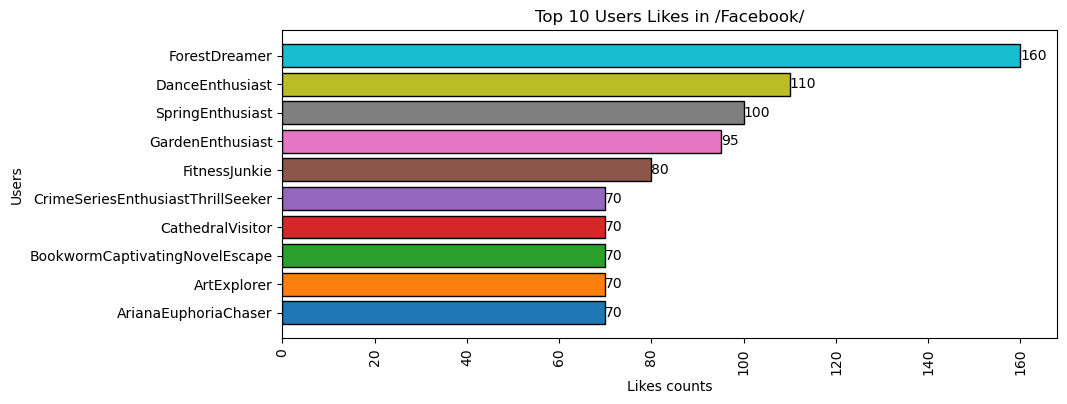

In [23]:
F_U_L=Facebook.groupby('User')['Likes'].sum().nlargest(10).sort_values(ascending=True)
plt.figure(figsize=(10,4))
plt.barh(F_U_L.index,F_U_L.values,color=sns.color_palette(),edgecolor='black')
for i in range(len(F_U_L)):
    plt.text(F_U_L.values[i],i,str(F_U_L.values[i]),va='center',ha='left')
plt.title('Top 10 Users Likes in /Facebook/')
plt.xlabel('Likes counts')
plt.ylabel('Users')
plt.xticks(rotation=90)
plt.show()

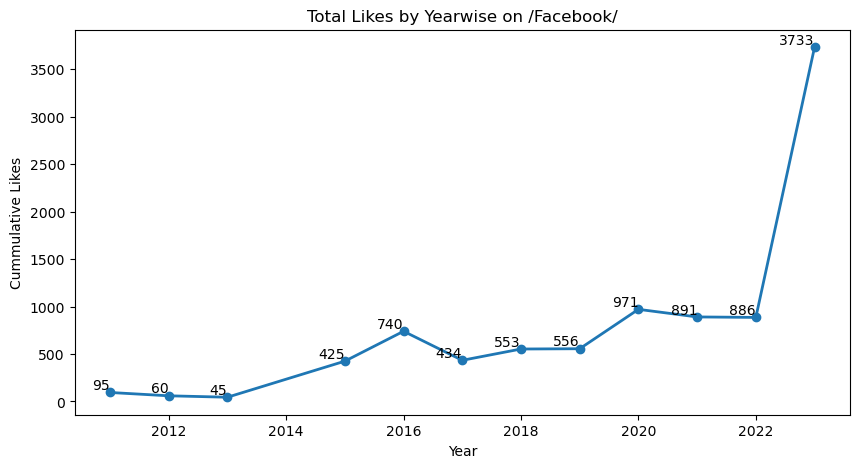

In [44]:
Fb_yearwise_likes=Facebook.groupby('Year')['Likes'].sum()
plt.figure(figsize=(10,5))
plt.plot(Fb_yearwise_likes.index,Fb_yearwise_likes.values,marker='o',linewidth=2)
for i in range(len(Fb_yearwise_likes)):
    plt.text(Fb_yearwise_likes.index[i],Fb_yearwise_likes.values[i],str(Fb_yearwise_likes.values[i]),va='bottom',ha='right')
plt.title('Total Likes by Yearwise on /Facebook/')
plt.xlabel('Year')
plt.ylabel('Cummulative Likes')
plt.show()

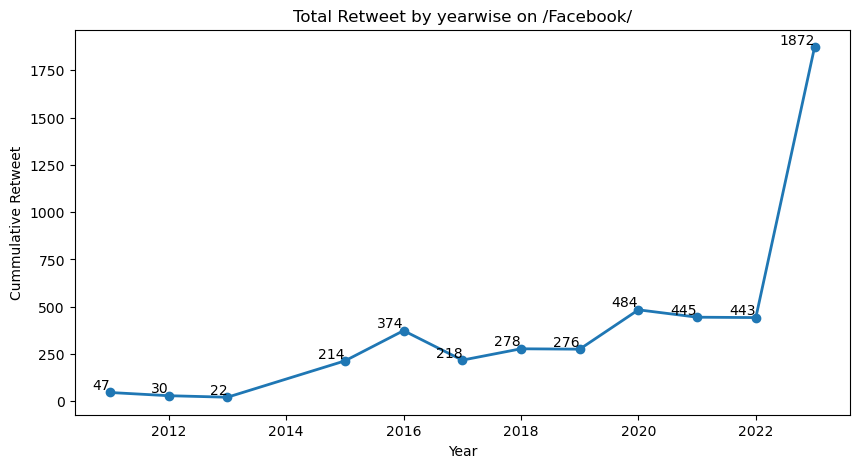

In [45]:
Fb_yearwise_retweets=Facebook.groupby('Year')['Retweets'].sum()
plt.figure(figsize=(10,5))
plt.plot(Fb_yearwise_retweets.index,Fb_yearwise_retweets.values,marker='o',linewidth=2)
for i in range(len(Fb_yearwise_retweets)):
    plt.text(Fb_yearwise_retweets.index[i],Fb_yearwise_retweets.values[i],str(Fb_yearwise_retweets.values[i]),va='bottom',ha='right')
plt.title('Total Retweet by yearwise on /Facebook/')
plt.xlabel('Year')
plt.ylabel('Cummulative Retweet')
plt.show()

# TWITTER

In [26]:
Twitter=df[df['Platform']=='Twitter']

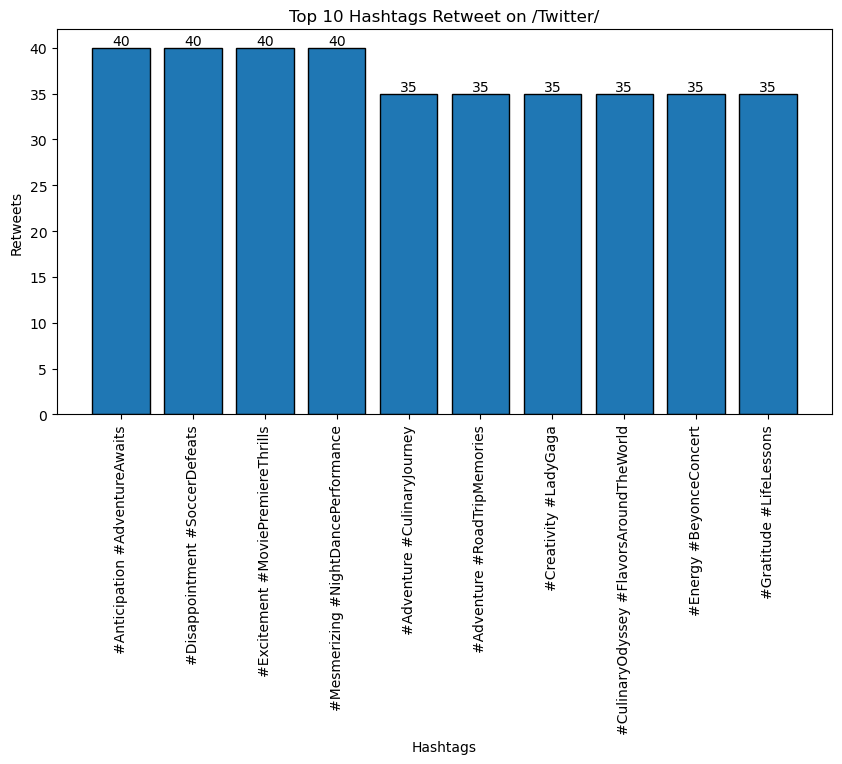

In [46]:
T_H_R=Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10)
plt.figure(figsize=(10,5))
plt.bar(T_H_R.index,T_H_R.values,edgecolor='black')
for i in range(len(T_H_R)):
    plt.text(T_H_R.index[i],T_H_R.values[i],str(T_H_R.values[i]),va='bottom',ha='center')
plt.title('Top 10 Hashtags Retweet on /Twitter/')
plt.xlabel('Hashtags')
plt.ylabel('Retweets')
plt.xticks(rotation=90)
plt.show()

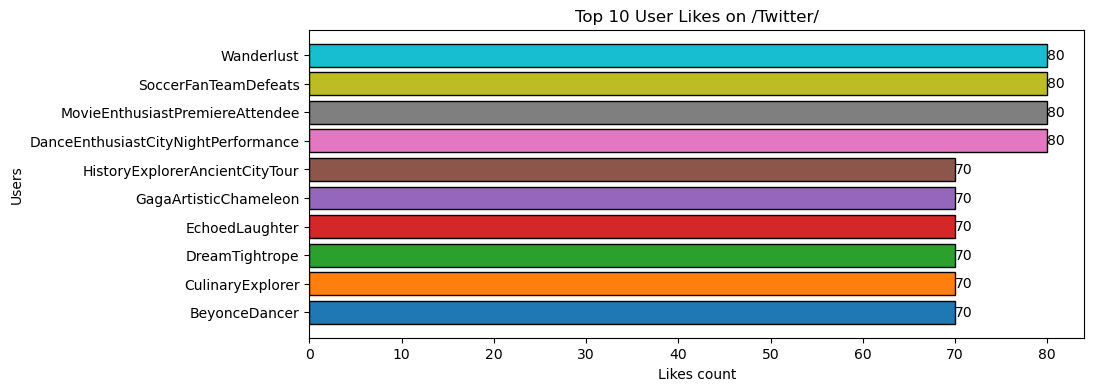

In [28]:
T_U_L=Twitter.groupby('User')['Likes'].max().nlargest(10).sort_values(ascending=True)
plt.figure(figsize=(10,4))
plt.barh(T_U_L.index,T_U_L.values,color=sns.color_palette(),edgecolor='black')
for i in range(len(T_U_L)):
    plt.text(T_U_L.values[i],i,str(T_U_L.values[i]),va='center',ha='left')
plt.title('Top 10 User Likes on /Twitter/')
plt.xlabel('Likes count')
plt.ylabel('Users')
plt.show()

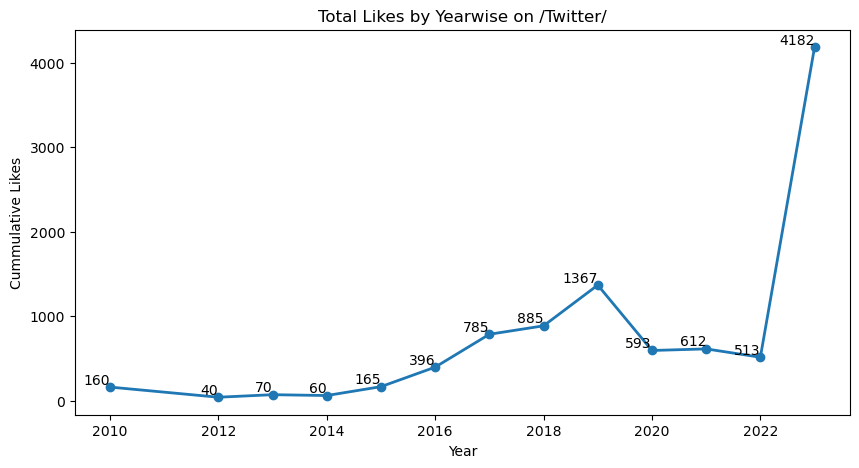

In [47]:
Twt_yearwise_likes=Twitter.groupby('Year')['Likes'].sum()
plt.figure(figsize=(10,5))
plt.plot(Twt_yearwise_likes.index,Twt_yearwise_likes.values,marker='o',linewidth=2)
for i in range(len(Twt_yearwise_likes)):
    plt.text(Twt_yearwise_likes.index[i],Twt_yearwise_likes.values[i],str(Twt_yearwise_likes.values[i]),va='bottom',ha='right')
plt.title('Total Likes by Yearwise on /Twitter/')
plt.xlabel('Year')
plt.ylabel('Cummulative Likes')
plt.show()

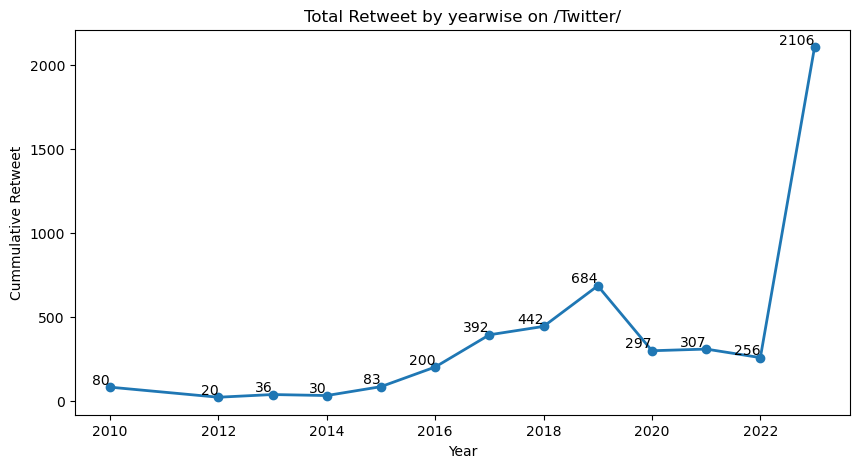

In [57]:
Twt_yearwise_retweet=Twitter.groupby('Year')['Retweets'].sum()
plt.figure(figsize=(10,5))
plt.plot(Twt_yearwise_retweet.index,Twt_yearwise_retweet.values,marker='o',linewidth=2)
for i in range (len(Twt_yearwise_retweet)):
    plt.text(Twt_yearwise_retweet.index[i],Twt_yearwise_retweet.values[i],str(Twt_yearwise_retweet.values[i]),va='bottom',ha='right')
plt.title('Total Retweet by yearwise on /Twitter/')
plt.xlabel('Year')
plt.ylabel('Cummulative Retweet')
plt.show()

# INSTAGRAM

In [31]:
Instagram=df[df['Platform']=='Instagram']

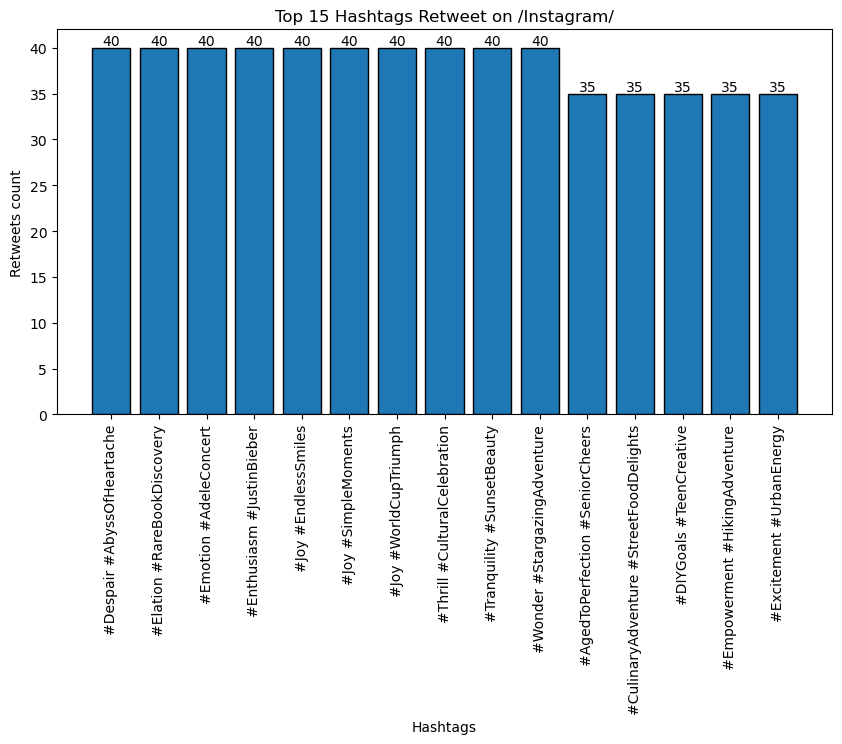

In [48]:
I_H_R=Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15)
plt.figure(figsize=(10,5))
plt.bar(I_H_R.index,I_H_R.values,edgecolor='black')
for i in range(len(I_H_R)):
    plt.text(I_H_R.index[i],I_H_R.values[i],str(I_H_R.values[i]),va='bottom',ha='center')
plt.title('Top 15 Hashtags Retweet on /Instagram/')
plt.xlabel('Hashtags')
plt.ylabel('Retweets count')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Top 15 Users Likes on /Instagram/')

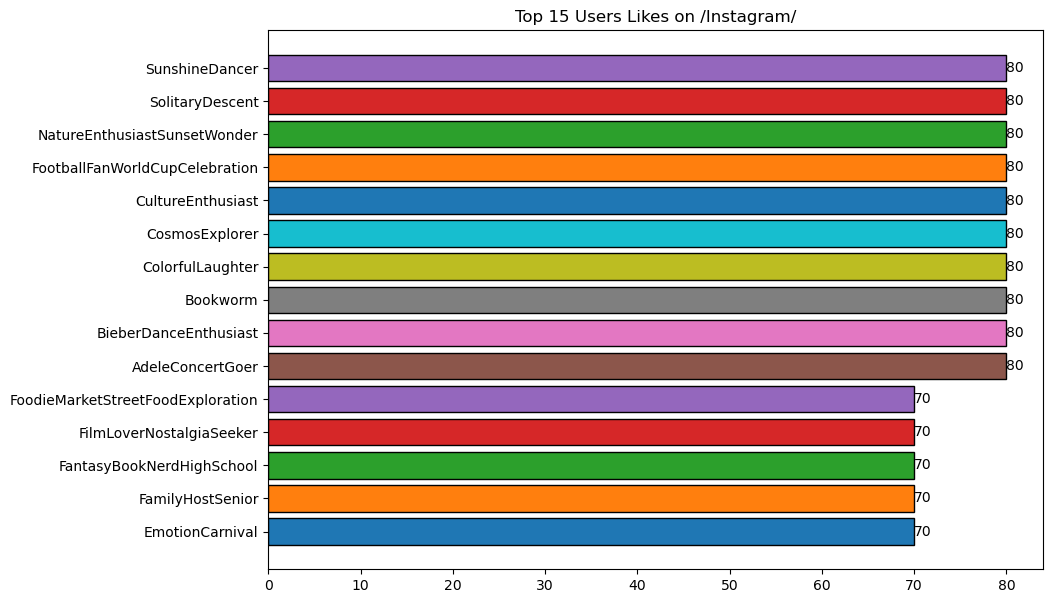

In [51]:
I_U_L=Instagram.groupby('User')['Likes'].max().nlargest(15).sort_values(ascending=True)
plt.figure(figsize=(10,7))
plt.barh(I_U_L.index,I_U_L.values,color=sns.color_palette(),edgecolor='black')
for i in range(len(I_U_L)):
    plt.text(I_U_L.values[i],i,str(I_U_L.values[i]),va='center',ha='left')
plt.title('Top 15 Users Likes on /Instagram/')

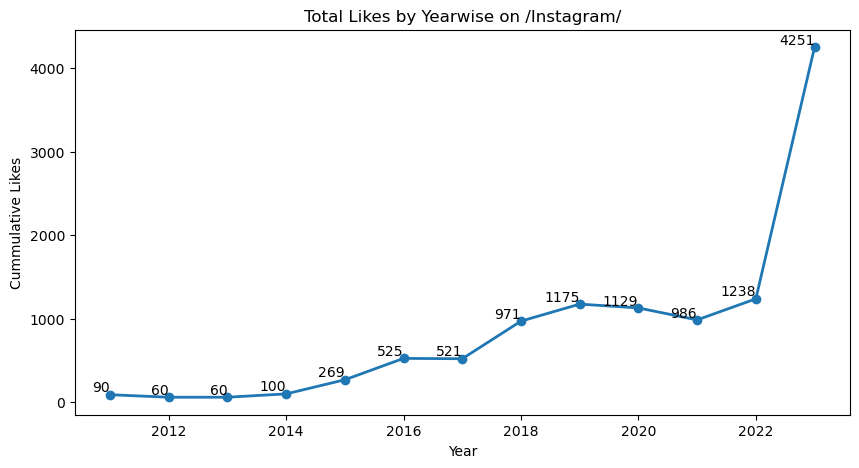

In [52]:
Insta_yearwise_likes=Instagram.groupby('Year')['Likes'].sum()
plt.figure(figsize=(10,5))
plt.plot(Insta_yearwise_likes.index,Insta_yearwise_likes.values,marker='o',linewidth='2')
for i in range(len(Insta_yearwise_likes)):
    plt.text(Insta_yearwise_likes.index[i],Insta_yearwise_likes.values[i],str(Insta_yearwise_likes.values[i]),va='bottom',ha='right')
plt.title('Total Likes by Yearwise on /Instagram/')
plt.xlabel('Year')
plt.ylabel('Cummulative Likes')
plt.show()

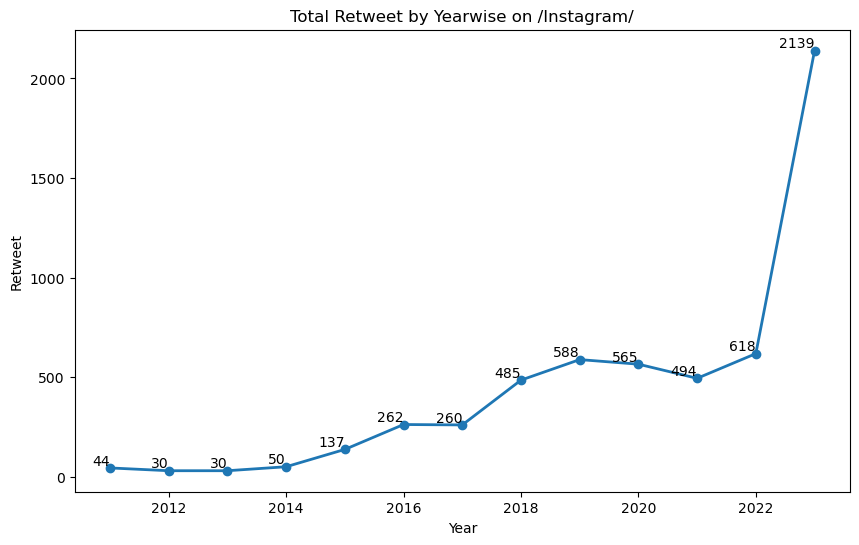

In [53]:
Insta_yearwise_retweet=Instagram.groupby('Year')['Retweets'].sum()
plt.figure(figsize=(10,6))
plt.plot(Insta_yearwise_retweet.index,Insta_yearwise_retweet.values,marker='o',linewidth='2')
for i in range(len(Insta_yearwise_retweet)):
    plt.text(Insta_yearwise_retweet.index[i],Insta_yearwise_retweet.values[i],str(Insta_yearwise_retweet.values[i]),va='bottom',ha='right')
plt.title('Total Retweet by Yearwise on /Instagram/')
plt.xlabel('Year')
plt.ylabel('Retweet')
plt.show()

# CONCLUSION
   >The conclusion of social media sentiment analysis system is shows that useage of social media is increased from year 2016 between the user's and posting the different content of post in social media. USA country user's are most contribute in social media. As technology continues to evolve, the accuracy and applicability of sentiment analysis will improve, making it an invaluable asset for strategic planning and communication in an increasingly digital world. 